# Kings County Housing Data

## Business Problem 

Imagine that we are a group of data scientists working for a real estate development company. Our goal is to construct a predictive model for stakeholders to determine what features (i.e., renovations) are worth investing resources in to increase the sale price of their properties. 

For wrangling purposes, we used the Python library usaddress in order to calculate `zipcode` based on `address`. 

In [384]:
# run this cell to verify that usaddress is installed and if not, to install it 
!pip install usaddress

In [134]:
# importing libraries 
import pandas as pd 
import seaborn as sns
import usaddress
import matplotlib.pyplot as plt
%matplotlib inline

The `zip_codes` dataset contains all zipcodes within King County, WA as well the city they correspond to. 

In [135]:
# opening zip_codes dataset 
zip_codes = pd.read_csv('KC_Data/King_County_zipcode.csv')

In [136]:
# dropping unnecessary columns
zip_codes.drop(zip_codes.columns[2], axis = 1, inplace = True)

In [137]:
# renaming columns in zipcode dataset 
zip_codes = zip_codes.rename(columns = {'ZIP':'zipcode', 'Primary City':'city'})

Our `kc_house_data` contains data on properties sold within King County, WA. 

In [138]:
# opening housing sales dataset and reading info 
pd.set_option('display.max_columns', None)
housing_data = pd.read_csv('KC_Data/kc_house_data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Duplicate Values

In [139]:
# getting info on columns 
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [140]:
# viewing first three records
housing_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [141]:
# viewing duplicate rows
housing_data[housing_data.duplicated(subset = 'id', keep = 'first')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [142]:
# dropping the identical row 
housing_data = housing_data.drop_duplicates()

We no longer need `id`, let's drop it. 

In [143]:
# dropping unnecessary columns column
housing_data.drop(columns = ['id'], inplace = True)

## Houses with No Bed/Bath
Some properties within our dataset, when sold, contained no `bedrooms` nor `bathrooms`. We find this to be unusual data. It could be possible that these properties were considered uninhabitable because of such features. For our purposes, we decided to drop such properties from our analysis since it is difficult to ascertain the circumstances behind its selling.

In [144]:
# seeing what records have no bedrooms / bathrooms at time of listing
len(housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)])
print(f" There are {len(housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)])} houses that have neither bed/bath at time of listing")

 There are 25 houses that have neither bed/bath at time of listing


In [145]:
# dropping all records that have no bedroom or house for cleaner analysis 
housing_data = housing_data[(housing_data['bedrooms'] != 0) & (housing_data['bathrooms'] != 0)]

In [146]:
# verifying that records were dropped
housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


## Waterfront Properties
Waterfront properties can be considered luxury properties. For our sake, including these properties may skew our data since the price distribution for waterfront properties may exceed the distribution of non-waterfront properties. We thus consider waterfront properties to be outliers in our dataset and decide to remove them. 

In [147]:
# calculating the amount of waterfront properties vs non-waterfront properties
housing_data['waterfront'].value_counts()

waterfront
NO     29591
YES      513
Name: count, dtype: int64

In [148]:
# evaluating how many properties have a waterfront view 
print(f" There are {housing_data['waterfront'].value_counts()[0]} that do not have a waterfront view")
print(f" There are {housing_data['waterfront'].value_counts()[1]} that do not have a waterfront view")

 There are 29591 that do not have a waterfront view
 There are 513 that do not have a waterfront view


<AxesSubplot:xlabel='waterfront', ylabel='price'>

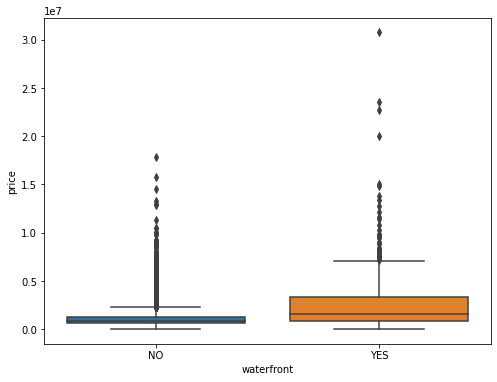

In [149]:
# plotting the price distribution for waterfront properties
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlabel("Waterfront Properties")
ax.set_ylabel("Price")
sns.boxplot(x = housing_data['waterfront'], y = 'price', data = housing_data)

Waterfront properties generally have a much higher median property sale price compared to those that are not. For a more robust analysis, we chose to exclude them from our final dataset.

In [150]:
# filtering out waterfront properties
housing_data = housing_data[housing_data['waterfront'] =="NO"]

## NaN Values 

In [151]:
# viewing nan values
housing_data.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      21
sewer_system     11
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Our dataset contains `NaN` values! It looks like `heat_source` and `sewer_system` contain them. Without additional data to cross-reference, we can't necessarily impute or replace `Nan` values with some other value so let's drop the records where such `NaN` values exist.

In [152]:
# dropping nan values 
housing_data.dropna(axis = 1, inplace = True)

In [153]:
# checking to see if NaN values were dropped
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

## Extracting Zipcode From Full Address

In order to perform a `pd.merge` later using `zipcode` as our join key, we need to find the `zipcode` corresponding to each property's `address`. This is where we will need the `usaddress` library. 

In [154]:
import usaddress
def extract_zipcode(address):
    parsed_address = usaddress.parse(address)
    for component in parsed_address:
        if component[1] == 'ZipCode':
            return component[0]
    return None
# applying function to the 'address' column to extract the zip code
housing_data['zipcode'] = housing_data['address'].apply(extract_zipcode)

In [155]:
# cleaning zip code column
housing_data['zipcode'] = housing_data['zipcode'].str.replace(',','')

In [156]:
# converting zip codes to strings
zip_codes['zipcode'] = zip_codes['zipcode'].astype(str)

In [157]:
# checking that records match with correct zip codes in King County
housing_data['zipcode'].isin(zip_codes['zipcode']).sum()

28652

## Address

In [158]:
# filtering properties whos address contains 'Washington'
housing_data = housing_data[housing_data['address'].str.contains('Washington') == True]

In [159]:
# further cleaning data by dropping unnecessary columns
housing_data.drop(columns = ['address'], inplace = True)

## Merging Dataframes

In [160]:
# merging housing_data with zip_code using zipcode to add city onto final dataframe
housing_data = pd.merge(housing_data, zip_codes, on = 'zipcode')

In [161]:
# checking to see if merge produced any NaN values 
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
lat              0
long             0
zipcode          0
city             0
dtype: int64

Now that we have a merged dataset containing our columns of interest, we chose to wrangle our data further by filtering based on the distribution of properties sold by city as well as performing minor calculations. 

## Cities with Few Properties Sold

In [162]:
# Creating a groupby DataFrame that groups property by city and calculates count and mean price
mean_prices = housing_data.groupby('city')['price'].mean().map('${:,.2f}'.format)
city_count_values = housing_data.groupby('city')['price'].count()
# print("Mean Prices by City:")
# print(mean_prices)
# print("\nCount Values by City:")
# print(city_count_values)
# print("\nMean bedrooms:")
# print(bedroom_mean)
combined_df = pd.concat([mean_prices, city_count_values], axis=1)
combined_df.columns = ['Mean Price', 'Count_city']
combined_df.sort_values(by = 'Mean Price', ascending = False)

,Mean Price,Count_city
city,,
Seattle,"$995,538.69",11838
Duvall,"$975,077.43",243
Ravensdale,"$964,111.46",65
Carnation,"$941,285.84",148
Vashon,"$876,493.64",141
Renton,"$867,534.22",2094
Black Diamond,"$803,996.30",293
Maple Valley,"$797,169.46",831
Kent,"$647,053.57",2064


Some cities contain less than 100 properties that were sold (e.g., Preston). These could be considered outliers in our distribution when looking at the distribution of property sale price for the entire county. For our purposes, we chose to remover records where the number of properties sold within a given city were less than 100. 

In [163]:
counts = housing_data['city'].value_counts()
city_filter = counts[counts < 100].index.tolist()
housing_data = housing_data[~housing_data['city'].isin(city_filter)]

In [164]:
housing_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode,city
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,1180,0,0,40,1969,0,47.461975,-122.190520,98055,Renton
1,3/2/2022,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,NONE,Average,7 Average,930,930,240,90,1950,2008,47.466730,-122.214000,98055,Renton
2,3/29/2022,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,NONE,Average,7 Average,1240,1240,490,60,1973,0,47.463930,-122.189740,98055,Renton
3,3/24/2022,565000.0,4,2.0,1400,10364,1.5,NO,NO,NO,NONE,Good,6 Low Average,1400,0,330,330,1971,0,47.448450,-122.212430,98055,Renton
4,12/28/2021,645000.0,3,2.0,1520,8250,1.0,NO,NO,NO,NONE,Average,8 Good,1190,590,420,200,1981,0,47.460870,-122.188690,98055,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,12/16/2021,1826000.0,2,3.0,2070,71264,2.0,NO,NO,NO,EXCELLENT,Average,9 Better,2070,1360,480,952,2001,0,47.504070,-122.471550,98070,Vashon
28540,4/14/2022,256000.0,2,1.0,1330,113815,1.0,NO,NO,NO,NONE,Good,7 Average,1330,0,280,0,1911,1962,47.387960,-122.456440,98070,Vashon
28541,7/14/2021,950000.0,2,2.5,1960,11406,2.0,NO,NO,NO,AVERAGE,Average,7 Average,1960,840,420,560,1938,1985,47.386190,-122.387935,98070,Vashon
28542,9/21/2021,450000.0,2,2.0,840,138520,1.0,NO,NO,NO,NONE,Average,6 Low Average,840,0,0,230,2020,0,47.458555,-122.475450,98070,Vashon


## Calculating Year & Month Sold 

For future EDA, it might be useful to consider the year and month the property sold as a potential factor in predicting sale price. 

In [165]:
# calculating month and year sold from date column
housing_data['sold_year'] = pd.to_datetime(housing_data['date']).dt.year
housing_data['sold_month'] = pd.to_datetime(housing_data['date']).dt.month

# dropping date column since no longer needed
housing_data.drop(columns = 'date', inplace = True)

## Calculating Property Age When Sold

The age of the property when it was sold, regardless of whether it had renovations done, could be useful in predicting sale price. 

In [166]:
# to calculate property age when sold, need to know when property was built and sold
housing_data[['sold_year', 'yr_built']]

,sold_year,yr_built
0,2022,1969
1,2022,1950
2,2022,1973
3,2022,1971
4,2021,1981
...,...,...
28539,2021,2001
28540,2022,1911
28541,2021,1938
28542,2021,2020


In [167]:
# calculating property age from the difference between the year it was sold vs built 
housing_data['age_sold'] = housing_data['sold_year'] - housing_data['yr_built']

## Houses That Have Been Renovated

Our current dataset contains information on the year a property was renovated. It might be useful to not only consider the year a property was renovated, but whether a property was renovated or not in predicting sale price. 

In [168]:
# calculating how many properties were renovated 
print(f" There are {len(housing_data[housing_data['yr_renovated'] != 0])} houses that have been renovated")

 There are 1244 houses that have been renovated


In [169]:
# creating a new column based on whether properties were renovated when sold 
housing_data['renovated'] =  housing_data['yr_renovated'] != 0
housing_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode,city,sold_year,sold_month,age_sold,renovated
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,1180,0,0,40,1969,0,47.461975,-122.190520,98055,Renton,2022,5,53,False
1,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,NONE,Average,7 Average,930,930,240,90,1950,2008,47.466730,-122.214000,98055,Renton,2022,3,72,True
2,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,NONE,Average,7 Average,1240,1240,490,60,1973,0,47.463930,-122.189740,98055,Renton,2022,3,49,False
3,565000.0,4,2.0,1400,10364,1.5,NO,NO,NO,NONE,Good,6 Low Average,1400,0,330,330,1971,0,47.448450,-122.212430,98055,Renton,2022,3,51,False
4,645000.0,3,2.0,1520,8250,1.0,NO,NO,NO,NONE,Average,8 Good,1190,590,420,200,1981,0,47.460870,-122.188690,98055,Renton,2021,12,40,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,1826000.0,2,3.0,2070,71264,2.0,NO,NO,NO,EXCELLENT,Average,9 Better,2070,1360,480,952,2001,0,47.504070,-122.471550,98070,Vashon,2021,12,20,False
28540,256000.0,2,1.0,1330,113815,1.0,NO,NO,NO,NONE,Good,7 Average,1330,0,280,0,1911,1962,47.387960,-122.456440,98070,Vashon,2022,4,111,True
28541,950000.0,2,2.5,1960,11406,2.0,NO,NO,NO,AVERAGE,Average,7 Average,1960,840,420,560,1938,1985,47.386190,-122.387935,98070,Vashon,2021,7,83,True
28542,450000.0,2,2.0,840,138520,1.0,NO,NO,NO,NONE,Average,6 Low Average,840,0,0,230,2020,0,47.458555,-122.475450,98070,Vashon,2021,9,1,False


## Building Grade

`grade` in our dataset contains information on the construction quality of improvements on a scale from 1-13. We'll need to clean the values in the column to extract only the integer value from the string. 

In [37]:
# Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
'''
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
'''

'\n1-3 Falls short of minimum building standards. Normally cabin or inferior structure.\n\n4 Generally older, low quality construction. Does not meet code.\n\n5 Low construction costs and workmanship. Small, simple design.\n\n6 Lowest grade currently meeting building code. Low quality materials and simple designs.\n\n7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.\n\n8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.\n\n9 Better architectural design with extra interior and exterior design and quality.\n\n10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.\n\n11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.\n\n12 Custom design and excellent builders. All materials are of 

In [170]:
# extracting only the integer value from the grade column
housing_data['grade'] = housing_data['grade'].str.extract('(\d+)').astype(int)

In [171]:
# sorting values by grade category
housing_data['grade'].value_counts().sort_index(ascending = True)

grade
1         1
2         1
3         7
4        37
5       347
6      2753
7     11314
8      8706
9      3501
10     1276
11      353
12      100
13       19
Name: count, dtype: int64

## Building Condition

`condition` in our dataset takes into consideration the building `age` as well as the `grade`. As is, `condition` is grouped into various categories which are objects. `condition`, however, can be considered ordinal data, so it will be useful for future analysis to consider the integer equivalent of such values. 

In [172]:
# viewing the unique values for condition
housing_data['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [173]:
# replacing the values within the column with integers to better represent its ordinal structure
housing_data['condition'].replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}, inplace = True)

In [174]:
# viewing the values after replacement
housing_data['condition']

0        4
1        3
2        3
3        4
4        3
        ..
28539    3
28540    4
28541    3
28542    3
28543    1
Name: condition, Length: 28415, dtype: int64

## Property View
`view` in our datast refers to the quality of view from house. This considers whether the property includes views of geographic landmarks or natural bodies of water, etc.

In [175]:
housing_data['view'].unique()

array(['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], dtype=object)

`View` can be considered ordinal data, so it is worth converting the values to integer for future analysis. 

In [176]:
housing_data['view'].replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace = True)

In [177]:
housing_data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode,city,sold_year,sold_month,age_sold,renovated
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,0,4,7,1180,0,0,40,1969,0,47.461975,-122.19052,98055,Renton,2022,5,53,False


## Creating Price Bins 
For future EDA purposes, it might be useful to 'bin' so as to visualize the distribution of property sales. 

In [178]:
# Create intervals of housing prices for grouping purposes:
price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, 5000000, float('inf')]
price_labels=['<500K', '500K-1M', '1M-1.5M','1.5M-2M','2M-3M', '3M-5M', '>5M']

# Create a new column of price intervals:
housing_data['price_group'] = pd.cut(housing_data['price'], bins = price_bins, labels = price_labels)

In [179]:
# viewing distribution of properties based on sale price bins
housing_data['price_group'].value_counts()

price_group
500K-1M    14509
1M-1.5M     5854
<500K       2961
1.5M-2M     2718
2M-3M       1720
3M-5M        550
>5M          103
Name: count, dtype: int64

After binning, we can see that the majority of properties were sold at a range of `$500,000 - $1M USD`. Less than 1% of properties were sold at a range greater than `$2M USD`. 

## Filtering Data 

Text(0.5, 1.0, 'Distribution of Property Prices')

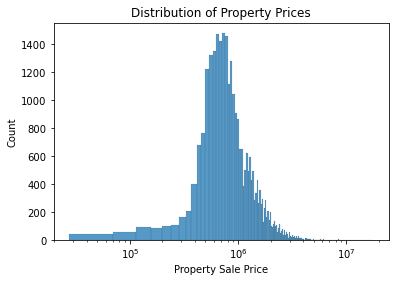

In [180]:
# plotting the distribution of price
ax = sns.histplot(x = 'price', data = housing_data)
ax.set_xscale('log')
ax.set_xlabel('Property Sale Price')
ax.set_title('Distribution of Property Prices')

In [181]:
# checking the shape of our cleaned dataframe 
housing_data.shape

(28415, 27)

## Cleaned Dataframe

After cleaning, our new dataset has been narrowed to contain only non-waterfront properties. We've dealt with NaN values and duplicate rows. Additionally, we've used `address` to calculate property `zipcode` and merged dataframes to include `city`. We've preformed minor calculations to determine the `age_sold` of properties, converted `yr_renovated` to a `boolean` type, and finally, grouped properties based on `price_groups`. Our new dataset is ready to be exported and used to perform EDA on. 

In [66]:
housing_data.to_csv('KC_Data/cleaned_housing_data')

In [67]:
pd.read_csv('KC_Data/cleaned_housing_data', index_col = 0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode,city,sold_year,sold_month,age_sold,renovated,price_group
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,0,4,7,1180,0,0,40,1969,0,47.461975,-122.190520,98055,Renton,2022,5,53,False,500K-1M
1,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,0,3,7,930,930,240,90,1950,2008,47.466730,-122.214000,98055,Renton,2022,3,72,True,500K-1M
2,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,0,3,7,1240,1240,490,60,1973,0,47.463930,-122.189740,98055,Renton,2022,3,49,False,500K-1M
3,565000.0,4,2.0,1400,10364,1.5,NO,NO,NO,0,4,6,1400,0,330,330,1971,0,47.448450,-122.212430,98055,Renton,2022,3,51,False,500K-1M
4,645000.0,3,2.0,1520,8250,1.0,NO,NO,NO,0,3,8,1190,590,420,200,1981,0,47.460870,-122.188690,98055,Renton,2021,12,40,False,500K-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,1826000.0,2,3.0,2070,71264,2.0,NO,NO,NO,4,3,9,2070,1360,480,952,2001,0,47.504070,-122.471550,98070,Vashon,2021,12,20,False,1.5M-2M
28540,256000.0,2,1.0,1330,113815,1.0,NO,NO,NO,0,4,7,1330,0,280,0,1911,1962,47.387960,-122.456440,98070,Vashon,2022,4,111,True,<500K
28541,950000.0,2,2.5,1960,11406,2.0,NO,NO,NO,2,3,7,1960,840,420,560,1938,1985,47.386190,-122.387935,98070,Vashon,2021,7,83,True,500K-1M
28542,450000.0,2,2.0,840,138520,1.0,NO,NO,NO,0,3,6,840,0,0,230,2020,0,47.458555,-122.475450,98070,Vashon,2021,9,1,False,<500K
